In [2]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

p = sns.color_palette
np.random.seed(0)

## Generating a dataset

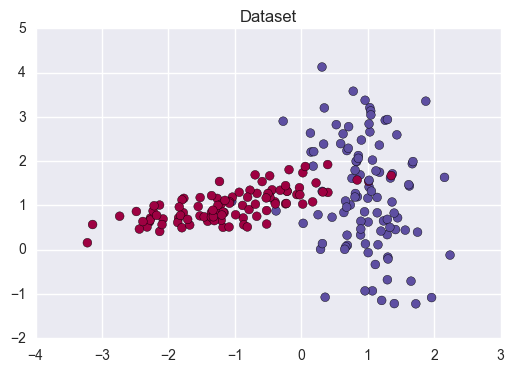

In [3]:
# Generate a dataset and plot it
X, Y = sklearn.datasets.make_classification(random_state=0, n_samples = 200, n_features = 2, n_redundant=0, n_informative=2, n_classes=2, n_clusters_per_class=1)
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral)
plt.title('Dataset')
plt.show()

# AdaBoost

In [4]:
clf=AdaBoostClassifier(n_estimators=1)
clf.fit(X, Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1, random_state=None)

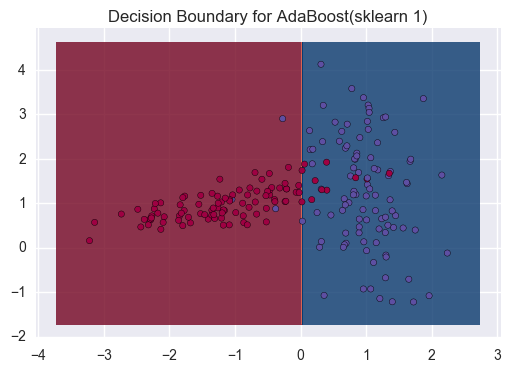

In [5]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, 30, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title("Decision Boundary for AdaBoost(sklearn 1)")
plt.show()

In [6]:
Z

array([[ 0.03225806,  0.03225806,  0.03225806, ...,  0.91588785,
         0.91588785,  0.91588785],
       [ 0.03225806,  0.03225806,  0.03225806, ...,  0.91588785,
         0.91588785,  0.91588785],
       [ 0.03225806,  0.03225806,  0.03225806, ...,  0.91588785,
         0.91588785,  0.91588785],
       ..., 
       [ 0.03225806,  0.03225806,  0.03225806, ...,  0.91588785,
         0.91588785,  0.91588785],
       [ 0.03225806,  0.03225806,  0.03225806, ...,  0.91588785,
         0.91588785,  0.91588785],
       [ 0.03225806,  0.03225806,  0.03225806, ...,  0.91588785,
         0.91588785,  0.91588785]])

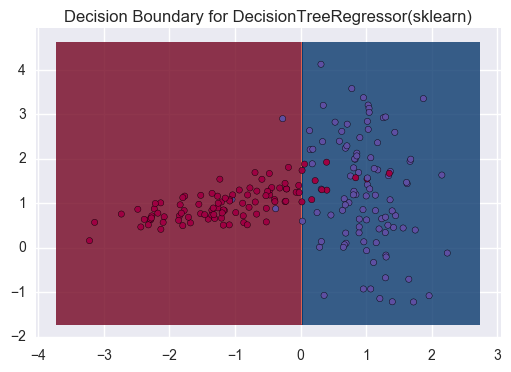

In [7]:
clf = tree.DecisionTreeRegressor(max_depth=1)
clf = clf.fit(X, Y)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, 30, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title("Decision Boundary for DecisionTreeRegressor(sklearn)")
plt.show()

In [8]:
Z

array([[ 0.03225806,  0.03225806,  0.03225806, ...,  0.91588785,
         0.91588785,  0.91588785],
       [ 0.03225806,  0.03225806,  0.03225806, ...,  0.91588785,
         0.91588785,  0.91588785],
       [ 0.03225806,  0.03225806,  0.03225806, ...,  0.91588785,
         0.91588785,  0.91588785],
       ..., 
       [ 0.03225806,  0.03225806,  0.03225806, ...,  0.91588785,
         0.91588785,  0.91588785],
       [ 0.03225806,  0.03225806,  0.03225806, ...,  0.91588785,
         0.91588785,  0.91588785],
       [ 0.03225806,  0.03225806,  0.03225806, ...,  0.91588785,
         0.91588785,  0.91588785]])

### 对比上面的深度为1的决策树结果，scikit-learn的adaboost基函数就是深度为一的决策树（深度不是1就是boosting tree），下面用scikit-learn的决策回归树实现下adaboost

### 手动实现adaboost迭代

adaboost就是前向分布加法算法的特例，模型由基本分类器组成加法模型，损失函数是指数函数
$$f(x)=\sum_{m=1}^M\alpha_mG_M(x)$$

$$L\left(y,f(x)\right)=\exp[-yf(x)]$$

#### boosting tree
$$f_M(x)=\sum_{m=1}^MT(x;\Theta_m)$$

$$\hat{\Theta}_m=\arg\min_{\Theta_m}\sum_{i=1}^NL(y_i,f_{m-1}(x_i)+T(x_i;\Theta_m))$$

$$L(y,f(x))=(y-f(x))^2$$

$$L(y,f(x))=[y-f_{m-1}(x)-T(x;\Theta_m)]^2$$

就是拟合当前数据的残差（residual）

提升树的训练算法：
- 初始化$f_0(x)=0$
- 对$m=1,2,...,M$
- - 计算残差$r_{mi}=y_i-f_{m-1}(x_i)$
- - 通过$r_{mi}$学习一个回归树，得到$T(x;\Theta_m)$
- - 更新$f_m(x)=f_{m-1}(x)+T(x;\Theta_m)$
- 得到回归提升树$f_M(x)=\sum_{m=1}^MT(x;\Theta_m)$

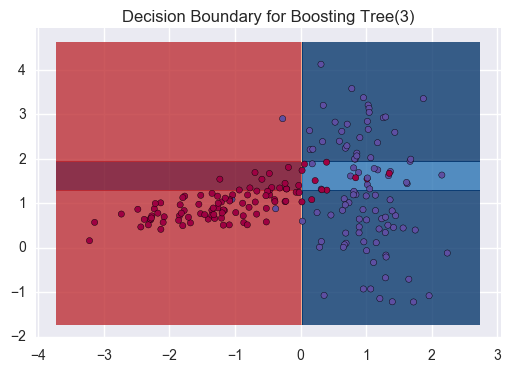

In [9]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
clf1 = tree.DecisionTreeRegressor(max_depth=1)
clf1.fit(X, Y)

Y_2 = Y - clf1.predict(X)
clf2 = tree.DecisionTreeRegressor(max_depth=1)
clf2.fit(X, Y_2)

Y_3 = Y_2 - clf2.predict(X)
clf3 = tree.DecisionTreeRegressor(max_depth=1)
clf3.fit(X, Y_3)

# Z = a1*clf1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) \
#     + a2*clf2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) \
#     + a3*clf3.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) \
    + clf2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) \
    + clf3.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, 30, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title("Decision Boundary for Boosting Tree(3)")
plt.show()

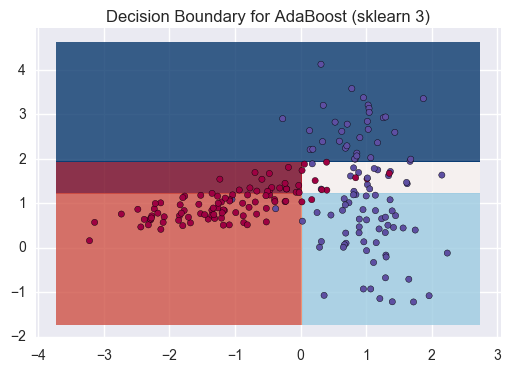

In [10]:
clf=AdaBoostClassifier(n_estimators=3, learning_rate=1)
clf.fit(X, Y)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, 30, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title("Decision Boundary for AdaBoost (sklearn 3)")
plt.show()

sklearn上的是adaboost与我实现的不同，我的算是一个深度为1的提升树吧。每个树的权重一样。而真正的adaboost是有权重变化的

## 总结
- adaboost是分类，用的是指数损失函数，树的深度为1
- boosting tree是回归，用的是平方损失函数

二者都是加法模型与前向分步算法

# GBDT

如果损失函数不是指数损失函数、平方损失函数，优化不容易呀！

针对一般损失函数，用最速下降法，就是梯度提升（gradient boosting）

主要思想就是利用损失函数的负梯度在当前模型的值，作为残差

- 初始化$f_0(x)=\arg\min_{c}\sum_{i=1}^NL(y_i,c)$
- 对$m=1,2,...,N$
- - 对$i=1,2,...,N$,计算$$r_{mi}=-\left[ \frac{\partial{L(y,f(x_i))}}{\partial{f(x_i)}}\right]_{f(x)=f_{m-1} (x)}$$
- - 对$r_{mi}$拟合一个回归树，叶节点区域为$R_{mj}$,$j=1,2,...,J$
- - 对$j=1,2,...,J$，计算$$c_{mj}=\arg\min_{c}\sum_{x_i\in{R_{mj}}}L(y_i,f_{m-1}(x_i)+c)$$
- - 更新$f_m(x)=f_{m-1}(x)+\sum_{j=1}^{J}c_{mj}I(x\in{R_{mj}})$
- 得到回归树$$\hat{f}(x)=f_M(x)=\sum_{m=1}^M\sum_{j=1}^Jc_{mj}I(x\in{R_{mj}})$$

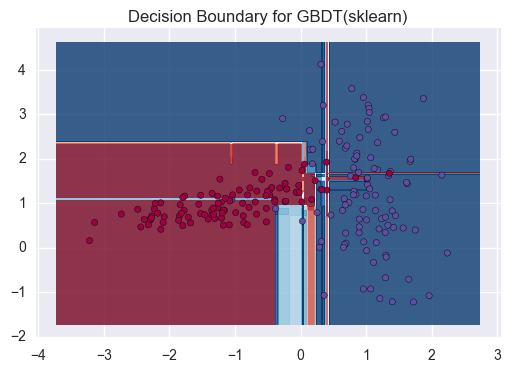

In [11]:
clf=GradientBoostingClassifier(n_estimators=50, max_depth=5, loss= 'deviance')
clf.fit(X, Y)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, 30, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title("Decision Boundary for GBDT(sklearn)")
plt.show()

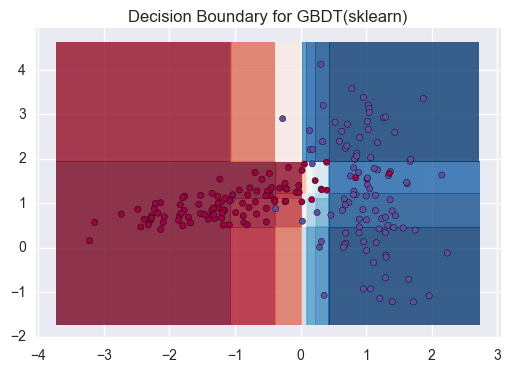

In [14]:
clf=GradientBoostingClassifier(n_estimators=50, max_depth=1, loss= 'exponential', criterion='mse')
clf.fit(X, Y)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, 30, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title("Decision Boundary for GBDT(sklearn)")
plt.show()

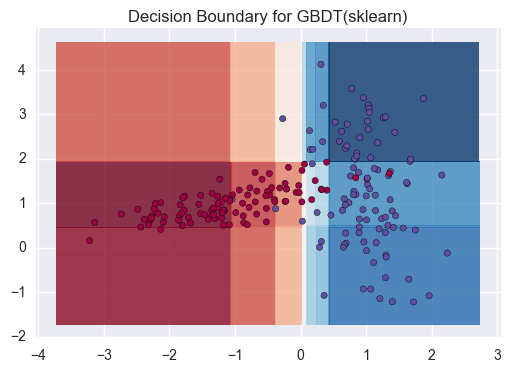

In [15]:
clf=AdaBoostClassifier(n_estimators=50, learning_rate=0.1,algorithm='SAMME' )
clf.fit(X, Y)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, 30, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title("Decision Boundary for GBDT(sklearn)")
plt.show()